# 389 Final Project
By: Donald, Jacob, and Phirrep

In [7]:
# Step 1: Let's import some libraries and say hi!

import numpy as np     # <----- Our old friend

import torch            # |  Our new best friends -- this is the main pytroch library
import torch.nn as nn   # |  This is just shortening the name of this module since we're gonna use it a lot -- this is the one that has neural network objects (nn.modules)
import torchvision      # |  This is for importing the vision datasets we'll use
from torch.utils.data import Dataset, DataLoader, random_split, Subset # | These are particular objects that we use to load our data (and shuffle it and whatnot) we'll talk more about these later
import torchvision.transforms as tt # | Allows us to transform our data while we load it (or after) such as rotating, flipping, ocluding, etc. 
from torchvision.datasets import ImageFolder # | ^^ less important for you


import torch.nn.functional as F # | This is for functional / in-place operations for example if I wanted to do a sigmoid operation, but not as a neural net object (though I can still update through it)



from torchvision.utils import make_grid  # |   Utility stuff for plotting
import matplotlib.pyplot as plt          # |  <- I use this one a lot for plotting, seaborn is a good alternative
from matplotlib.image import imread      # |  it reads images... (png -> usable input (like a numpy array for ex))
import os
import random
from tqdm import tqdm  # | This one is a cute one for making a loading bar, I like it and we'll use it here


In [81]:
import os
from PIL import Image
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms

class CustomDataset(Dataset):
    def __init__(self, images_folder, labels_file, transform=None):
        self.images_folder = images_folder
        self.labels = self.read_labels(labels_file)
        self.transform = transform

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        image_name, label = self.labels[idx]
        image_path = os.path.join(self.images_folder, image_name)
        image = Image.open(image_path).convert("RGB")
        if self.transform:
            image = self.transform(image)
        return image, label

    def read_labels(self, labels_file):
        labels = []
        with open(labels_file, 'r') as file:
            count = 0
            for line in file:
                parts = line.strip().split()  # Assuming each line has image name and label separated by space
                label = float(parts[0])  # Assuming labels are integers
                labels.append((f"frame_{count:04d}.png", label))
                count += 1
        return labels

def loaddataset(batch_size):
    images_folder = "vid0_frames"
    labels_file = "labeled/0.txt"
    transform = None  # You can define transformations here if needed (e.g., torchvision.transforms.ToTensor())

    transform = transforms.Compose([
    transforms.Resize((109, 146)),  # Resize image to a square 256x256
    transforms.ToTensor()  # Convert image to tensor
    ])

    dataset = CustomDataset(images_folder, labels_file, transform)

# Create a DataLoader to iterate over the dataset

    dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)
    return dataset, dataloader



In [78]:
def plot_image_and_label(image, label):
    
    '''
    Takes in an image and label and shows them using matplotlib 
    this is used to visualize the data and also the outputs of our network
    '''
    image = image.permute(1, 2, 0)

    plt.imshow(image)
    plt.title("Label = " + str(label))
    plt.show()
    return

torch.Size([3, 109, 146])


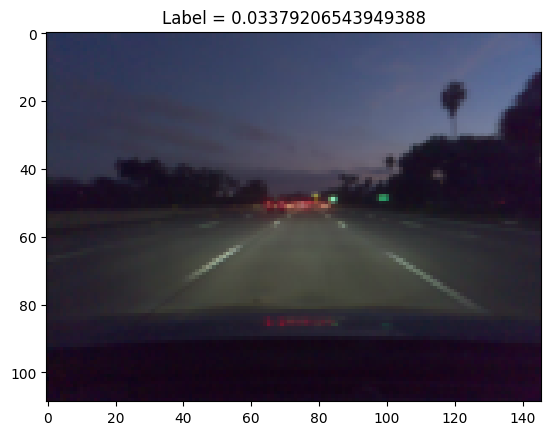

In [83]:
train_dataset, train_dataloader = loaddataset(batch_size=1)
ex_image, ex_label = train_dataset[random.randint(0,1000)]
print(ex_image.shape)
plot_image_and_label(ex_image, ex_label)

In [84]:
class MyMLP(nn.Module):

    '''
    Now that you're an expert in pytorch you can make a slightly more serious model

    You can include as many linear layers as you'd like (I used 3 in my testing), but make sure to have a ReLU
    in between each (but not at the end)

    I also included a SoftMax (which acts similarly to a max but returns values which add up to 1 -- 
    and is differentiable) at the end of the model to allow it to compare to MNIST labels
    '''


    def __init__(self, input_size, output_size):
        super(MyMLP, self).__init__()

        self.input_size = input_size # making the input size accessible

        # TODO initalize your layers here 
        # that makes up the model -- use nn.Linear and nn.ReLU
        # this would be convention of what we would need to init for a 3 layer network with nonlinearities
        # Note that I onlt defined one nonlinearity (cause they dont have parameters)
        #################################

        self.lin1 = nn.Linear(input_size,2000)
        self.lin2 = nn.Linear(2000,700)
        self.lin3 = nn.Linear(700,100)

        self.lin4 = nn.Linear(100,1)

        self.relu = nn.ReLU()

        #################################


    def forward(self, x):

        x = x.view(-1, self.input_size)   # This reshapes the input to work with the batches

        # TODO perform the forward pass of you model 
        # use the modules you initialized above (each should be used)
        #################################

        out =

        #################################

        return out